In [1]:
import os
seed = 10
os.environ['PYTHONHASHSEED']=str(seed)

In [2]:
import requests
import lxml
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils import compute_class_weight
import tensorflow as tf
from pil import Image
from sklearn import preprocessing
import tensorflow_addons as tfa

count = 0

In [3]:
seed = 10
df = pd.read_csv("data/cyclic_tickers/initial_indicators/ANF_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,21.5000,24.211693,-82.142857,-6805500.0,2.0
2000-01-24,20.2500,23.602201,-92.465753,-8986800.0,1.0
2000-01-25,20.1875,23.076863,-92.307692,-11383100.0,2.0
2000-01-26,20.8750,22.738115,-82.786885,-9392500.0,2.0
2000-01-27,22.8750,22.759174,-56.557377,-6811000.0,2.0


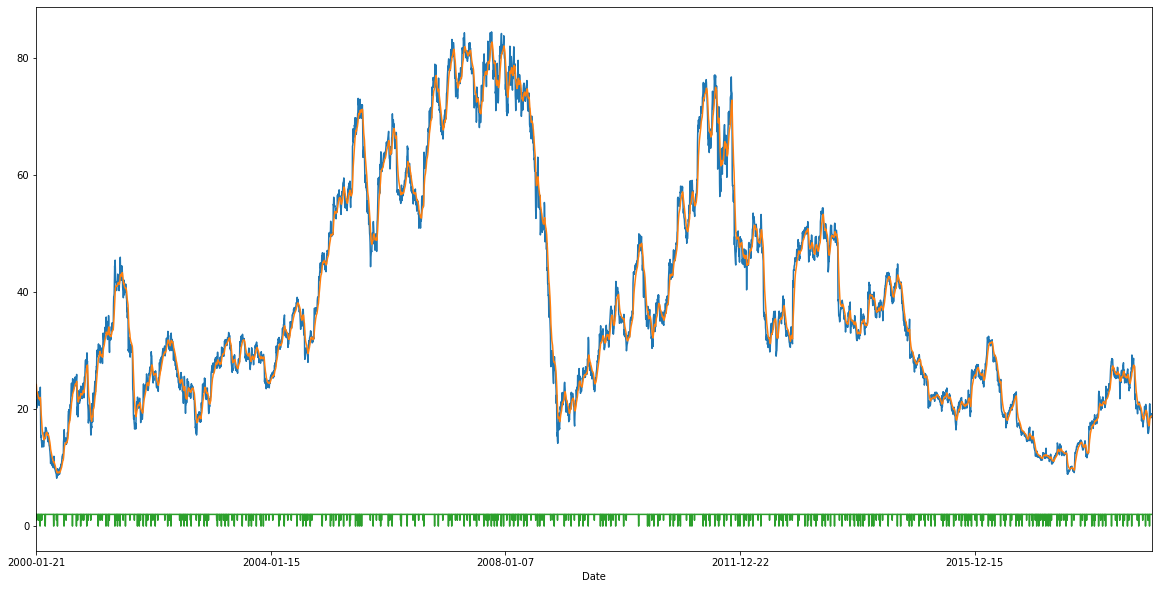

In [4]:
#%matplotlib notebook
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

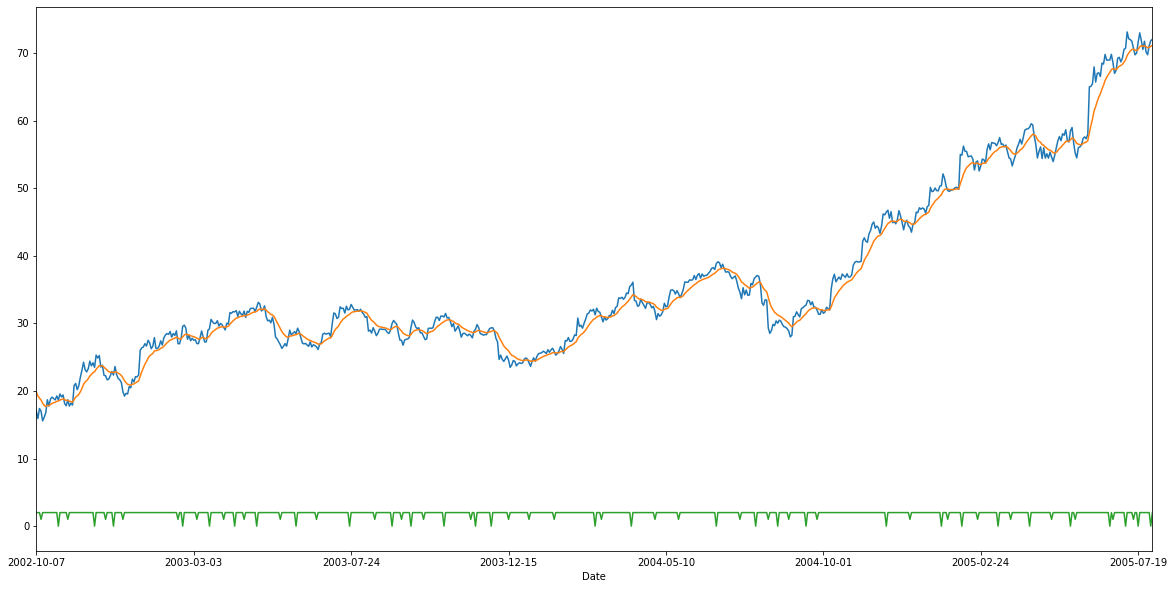

In [5]:
df = df.loc['2002-10-07':'2005-08-01']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [6]:
df.to_csv('bull phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [7]:
acc_df = df
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 710 entries, 2002-10-07 to 2005-08-01
Data columns (total 5 columns):
previous_1d    710 non-null float64
EMA_12         710 non-null float64
willr_14       710 non-null float64
OBV_7          710 non-null float64
labels         710 non-null float64
dtypes: float64(5)
memory usage: 33.3+ KB


In [8]:
seed = 10
df = pd.read_csv("data/cyclic_tickers/initial_indicators/BA_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,46.5000,43.946622,-19.402985,20099500.0,2.0
2000-01-24,45.6875,44.214450,-29.104478,15707000.0,2.0
2000-01-25,44.3125,44.229534,-45.522388,12400800.0,2.0
2000-01-26,45.6875,44.453837,-34.821429,17458000.0,2.0
2000-01-27,46.1875,44.720554,-27.678571,20548100.0,2.0


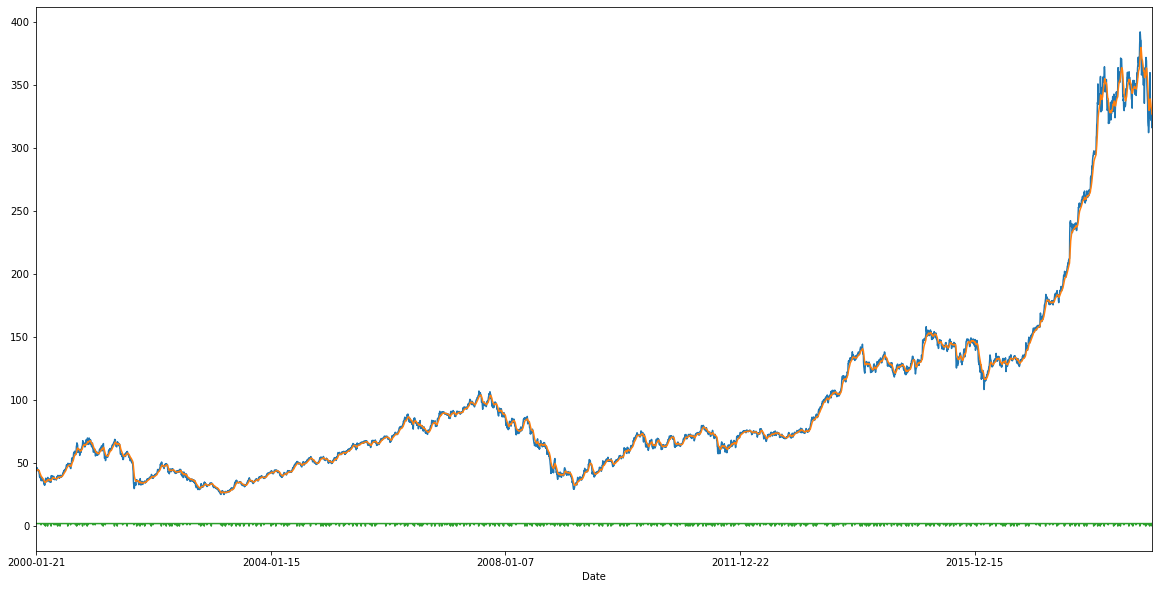

In [9]:
#%matplotlib notebook
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

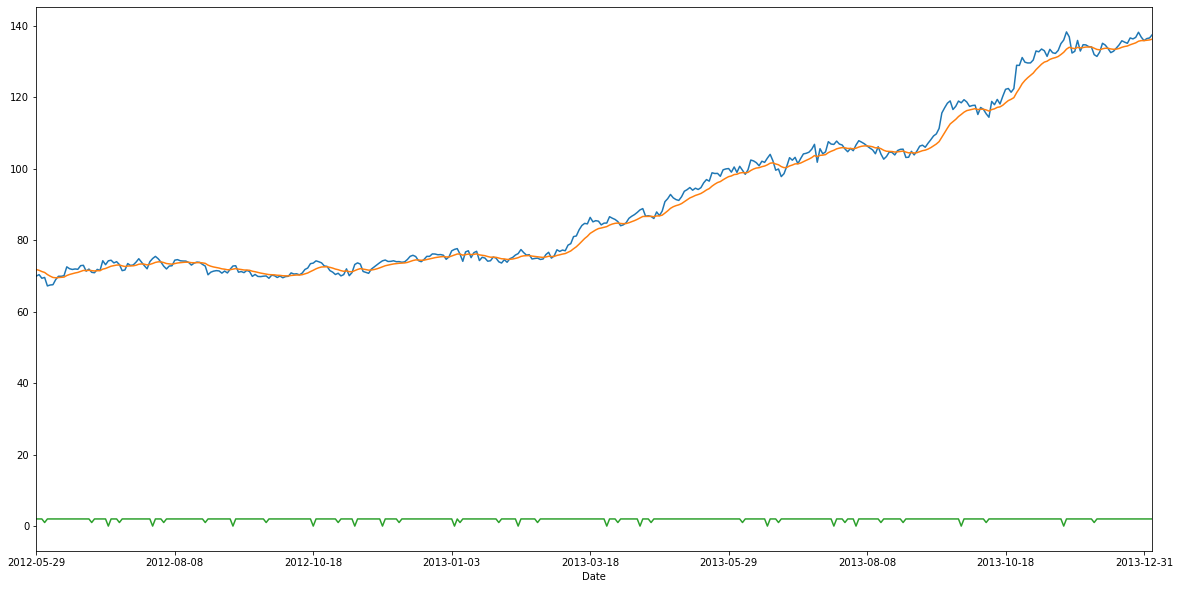

In [10]:
df = df.loc['2012-05-29':'2014-01-06']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [11]:
df.to_csv('bull phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [12]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1114 entries, 2002-10-07 to 2014-01-06
Data columns (total 5 columns):
previous_1d    1114 non-null float64
EMA_12         1114 non-null float64
willr_14       1114 non-null float64
OBV_7          1114 non-null float64
labels         1114 non-null float64
dtypes: float64(5)
memory usage: 52.2+ KB


In [13]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/600104.SS_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-24,3.189194,3.249583,-69.696967,61394527.0,2.0
2000-01-25,3.205140,3.242745,-79.136806,75032521.0,2.0
2000-01-26,3.402870,3.267380,-34.532549,127274101.0,2.0
2000-01-27,3.284870,3.270071,-62.500055,91746305.0,2.0
2000-01-28,3.252978,3.267441,-69.852957,65314909.0,2.0


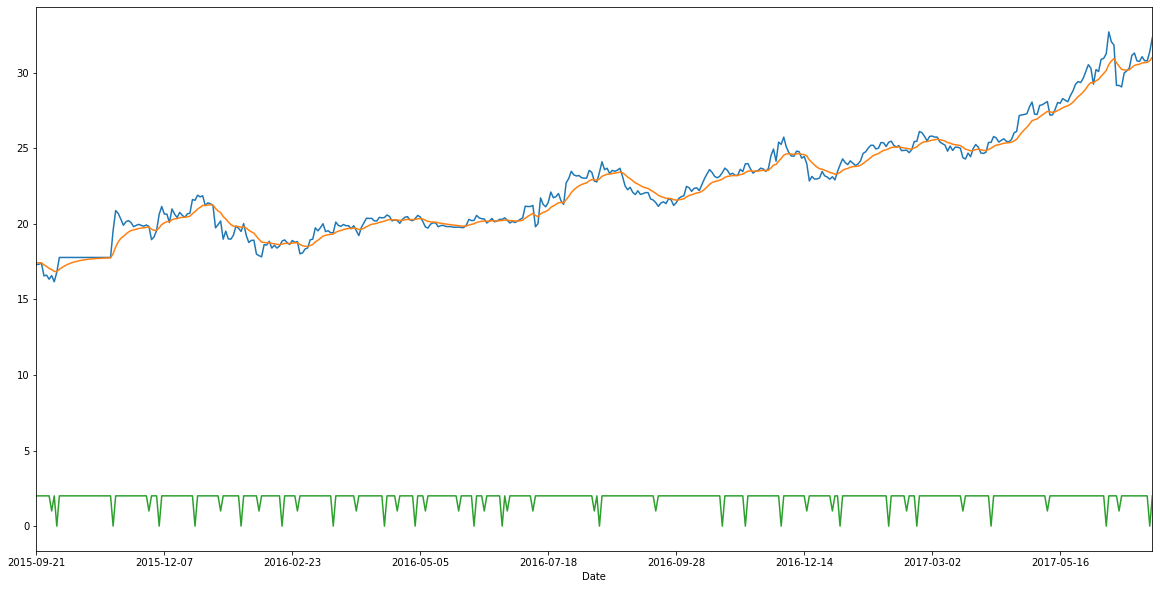

In [14]:
df = df.loc['2015-09-20':'2017-07-09']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [15]:
df.to_csv('bull phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [16]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1551 entries, 2002-10-07 to 2017-07-07
Data columns (total 5 columns):
previous_1d    1551 non-null float64
EMA_12         1551 non-null float64
willr_14       1551 non-null float64
OBV_7          1551 non-null float64
labels         1551 non-null float64
dtypes: float64(5)
memory usage: 72.7+ KB


In [17]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/O39.SI_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,6.793788,7.018572,-90.000010,-1965914.0,2.0
2000-01-24,6.890842,6.998922,-77.777802,6276910.0,2.0
2000-01-25,6.793788,6.967363,-85.714286,-511055.0,2.0
2000-01-26,6.745261,6.933193,-86.666549,-7435027.0,2.0
2000-01-27,6.890842,6.926678,-66.666601,-3725757.0,2.0


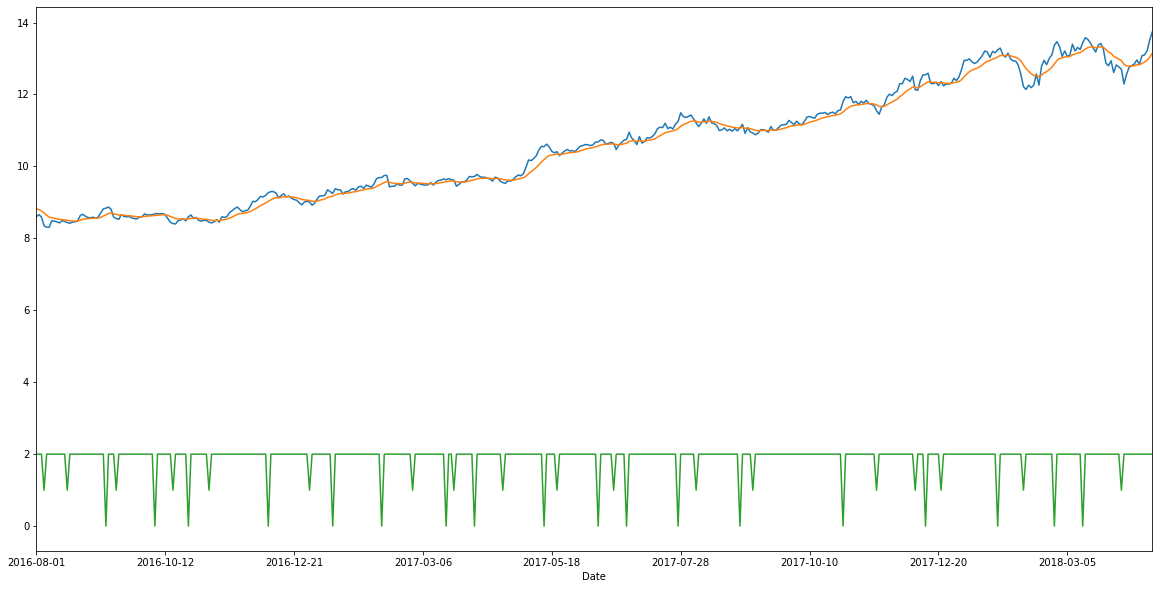

In [18]:
df = df.loc['2016-07-31':'2018-04-22']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [19]:
df.to_csv('bull phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [20]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1985 entries, 2002-10-07 to 2018-04-20
Data columns (total 5 columns):
previous_1d    1985 non-null float64
EMA_12         1985 non-null float64
willr_14       1985 non-null float64
OBV_7          1985 non-null float64
labels         1985 non-null float64
dtypes: float64(5)
memory usage: 93.0+ KB


In [21]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/JPM_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,49.375000,48.388499,-42.592593,-2894250.0,2.0
2000-01-24,48.625000,48.424884,-39.516144,-8054850.0,2.0
2000-01-25,48.666668,48.462081,-38.709668,-1595700.0,2.0
2000-01-26,49.750000,48.660222,-17.741956,5984250.0,2.0
2000-01-27,52.291668,49.218906,-5.232557,14370900.0,2.0


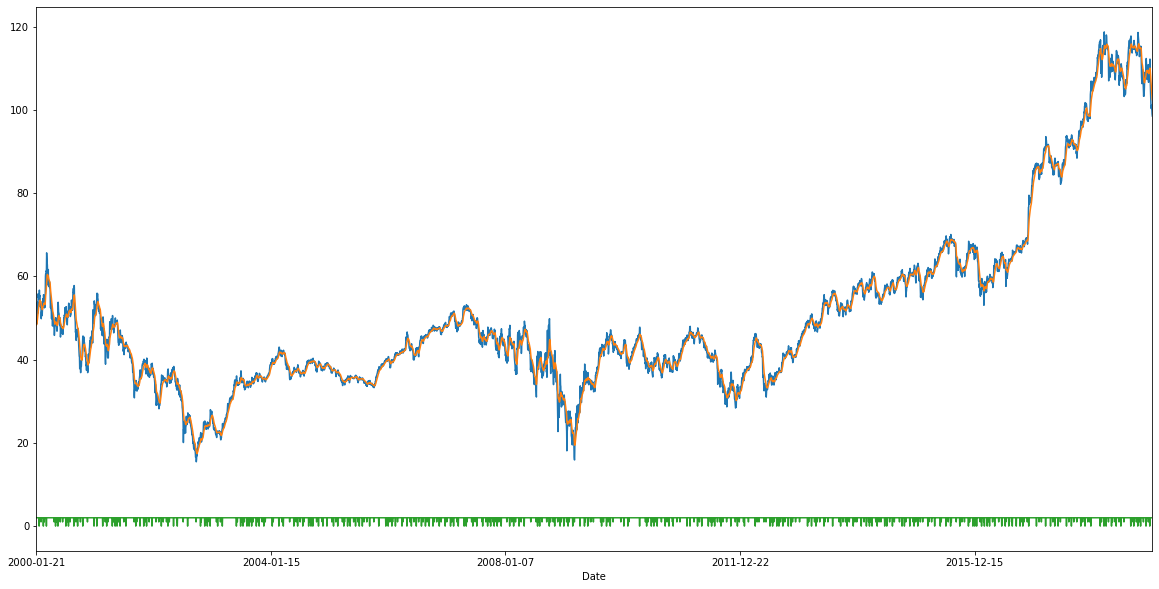

In [22]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

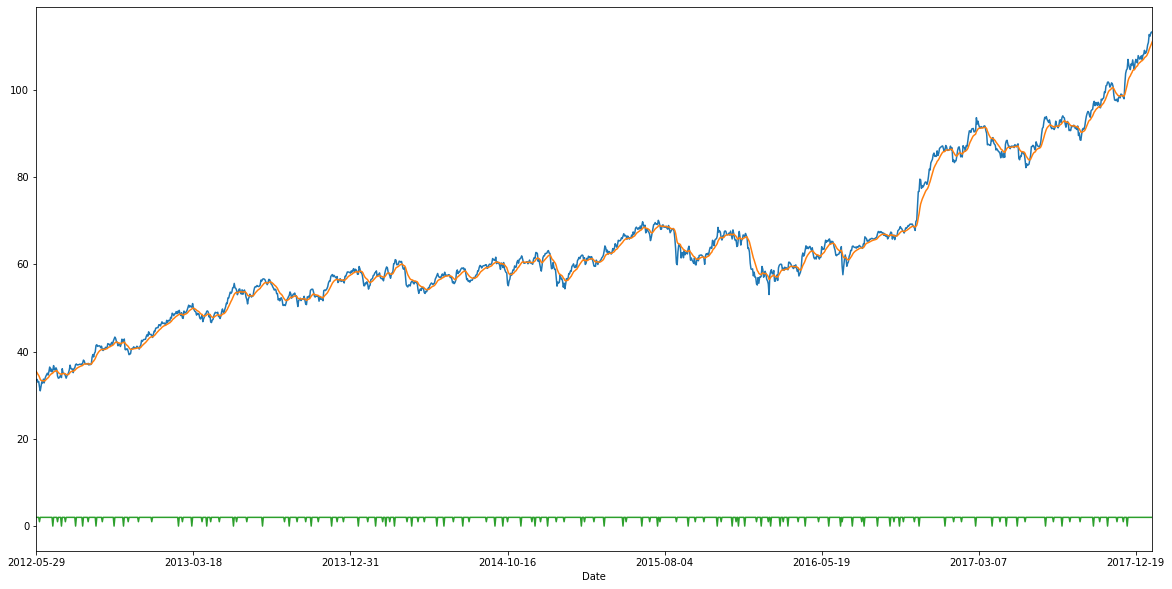

In [23]:
df = df.loc['2012-05-29':'2018-01-22']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [24]:
df.to_csv('bull phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [25]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3407 entries, 2002-10-07 to 2018-01-22
Data columns (total 5 columns):
previous_1d    3407 non-null float64
EMA_12         3407 non-null float64
willr_14       3407 non-null float64
OBV_7          3407 non-null float64
labels         3407 non-null float64
dtypes: float64(5)
memory usage: 159.7+ KB


In [29]:
df = pd.read_csv("data/noncyclic_tickers/initial_indicators/2319.HK_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2004-06-30,2.575,2.436754,-19.047606,495757896.0,2.0
2004-07-01,2.525,2.450330,-33.333298,480565876.0,2.0
2004-07-02,2.525,2.461818,-33.333298,480565876.0,2.0
2004-07-05,2.550,2.475385,-27.777775,505227876.0,2.0
2004-07-06,2.550,2.486864,-27.777775,505227876.0,2.0


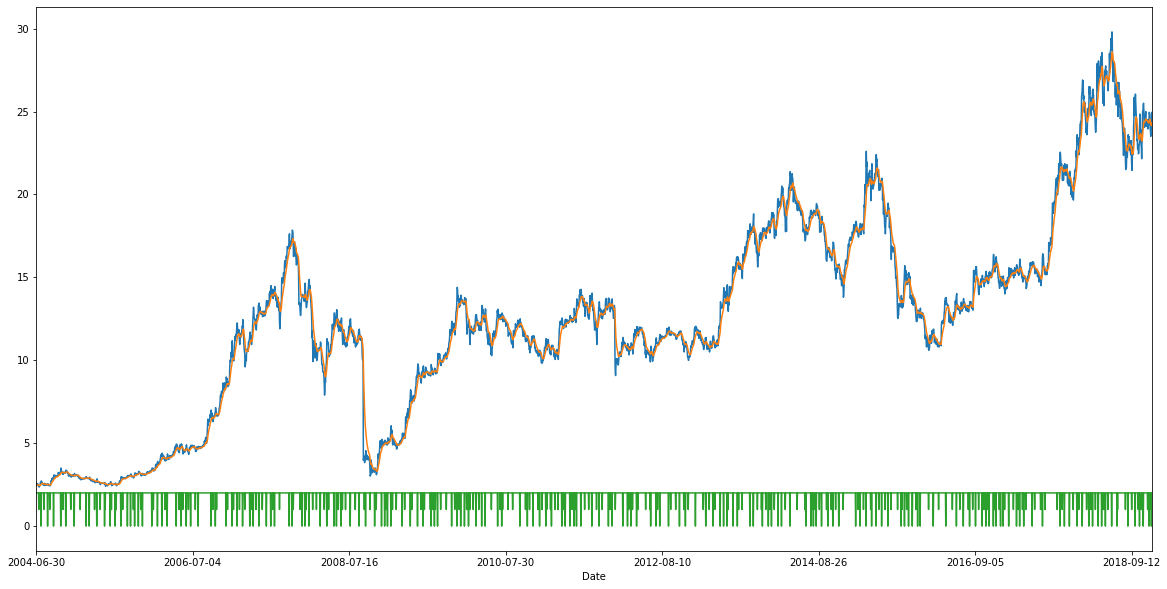

In [30]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

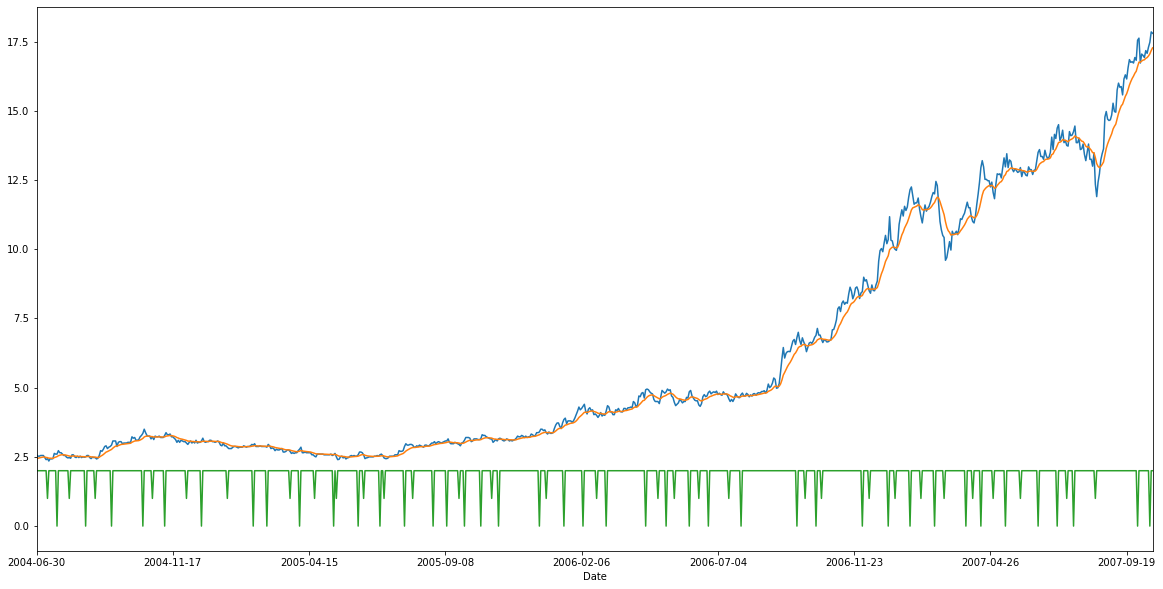

In [31]:
df = df.loc[:'2007-10-21']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [32]:
df.to_csv('bull phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [33]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4227 entries, 2002-10-07 to 2007-10-18
Data columns (total 5 columns):
previous_1d    4227 non-null float64
EMA_12         4227 non-null float64
willr_14       4227 non-null float64
OBV_7          4227 non-null float64
labels         4227 non-null float64
dtypes: float64(5)
memory usage: 198.1+ KB


## Test Set

In [39]:
df = pd.read_csv("data/noncyclic_tickers/initial_indicators/600519.SS_data_test2.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2020-01-22,1075.300049,1097.577291,-89.711935,1200864.0,2.0
2020-01-23,1075.510010,1094.182325,-70.779503,4820868.0,2.0
2020-02-03,1052.800049,1087.815821,-81.895216,-525975.0,1.0
2020-02-04,1003.919983,1074.908769,-83.419991,-12870263.0,2.0
2020-02-05,1038.010010,1069.232037,-59.790669,-6607845.0,2.0


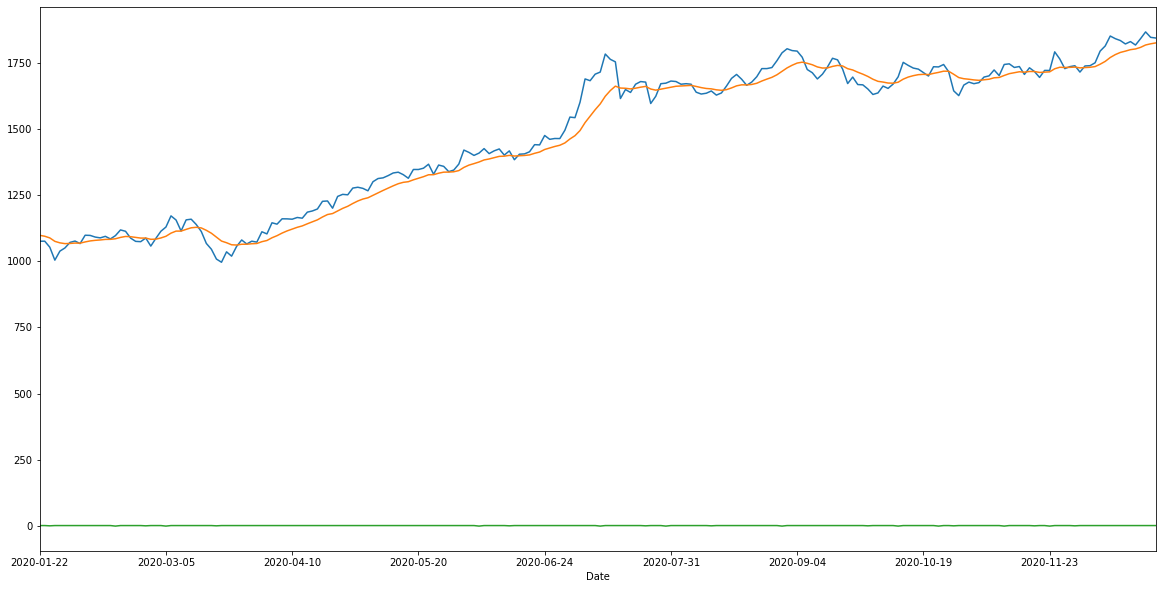

In [40]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [41]:
df.to_csv('bull phase data/test_acc_data.csv')